In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Mount Google drive to access the dataset (monkeys_dataset.zip)
import zipfile
import csv

In [2]:
folder_names = []
file_names = []
full_names = []
with os.scandir('images') as entries:
    for file in entries:
        folder_names.append(str(file)[str(file).find('\'')+1:str(file).rfind('\'')])
for x in range(len(folder_names)):
    with os.scandir('images/' + folder_names[x]) as entries:
        for file in entries:
            file_names.append(folder_names[x] + '/' + file.name)
file_names = file_names[:2000]


['apple_pie/1005649.jpg', 'apple_pie/1011328.jpg', 'apple_pie/101251.jpg', 'apple_pie/1014775.jpg', 'apple_pie/1026328.jpg', 'apple_pie/1028787.jpg', 'apple_pie/1034399.jpg', 'apple_pie/103801.jpg', 'apple_pie/1038694.jpg', 'apple_pie/1043283.jpg', 'apple_pie/1047447.jpg', 'apple_pie/1050519.jpg', 'apple_pie/1057749.jpg', 'apple_pie/1057810.jpg', 'apple_pie/1068632.jpg', 'apple_pie/1072416.jpg', 'apple_pie/1074856.jpg', 'apple_pie/1074942.jpg', 'apple_pie/1076891.jpg', 'apple_pie/1077610.jpg', 'apple_pie/1077964.jpg', 'apple_pie/1088809.jpg', 'apple_pie/1097378.jpg', 'apple_pie/110043.jpg', 'apple_pie/1103795.jpg', 'apple_pie/1106961.jpg', 'apple_pie/1109597.jpg', 'apple_pie/1111062.jpg', 'apple_pie/1112300.jpg', 'apple_pie/1112838.jpg', 'apple_pie/1113017.jpg', 'apple_pie/1121884.jpg', 'apple_pie/112378.jpg', 'apple_pie/1133267.jpg', 'apple_pie/1142597.jpg', 'apple_pie/1147371.jpg', 'apple_pie/1154371.jpg', 'apple_pie/1158360.jpg', 'apple_pie/1159801.jpg', 'apple_pie/1165004.jpg', 'ap

In [3]:
images = []
for x in file_names:
    img = cv2.imread("images/" + x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)


In [4]:
images = np.array(images)

In [5]:
images[100].shape

(343, 512, 3)

In [6]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images = []
for x in images:
    x=scale_resize_image(x)
    resized_images.append(x)


In [7]:
resized_images = np.array(resized_images)

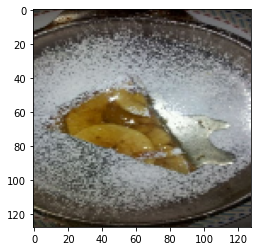

In [8]:
plt.imshow(resized_images[0])

In [9]:
labels = []
for x in range(1000):
    labels.append("Apple Pie")
for x in range(1000):
    labels.append("Baby Back Ribs")

In [10]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(resized_images, labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [11]:
X_train, X_test, y_train, y_test, X_val, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), np.array(X_val), np.array(y_val)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1620, 128, 128, 3) (1620,)
(180, 128, 128, 3) (180,)
(200, 128, 128, 3) (200,)


In [12]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [13]:
X_train_normalized = X_train
X_val_normalized = X_val
X_test_normalized = X_test

In [16]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(1, activation='sigmoid'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.3, momentum=0.9)
opt=tf.keras.optimizers.Nadam()
# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_5 (Dense)             (None, 32)               

In [17]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=4,
            verbose=2
)

Epoch 1/10
405/405 - 45s - loss: 0.6973 - accuracy: 0.5784 - val_loss: 0.6191 - val_accuracy: 0.7500 - 45s/epoch - 112ms/step
Epoch 2/10
405/405 - 38s - loss: 0.6034 - accuracy: 0.6938 - val_loss: 0.4490 - val_accuracy: 0.8111 - 38s/epoch - 94ms/step
Epoch 3/10
405/405 - 35s - loss: 0.5196 - accuracy: 0.7765 - val_loss: 0.3432 - val_accuracy: 0.8500 - 35s/epoch - 87ms/step
Epoch 4/10
405/405 - 34s - loss: 0.4629 - accuracy: 0.7981 - val_loss: 0.3675 - val_accuracy: 0.8222 - 34s/epoch - 83ms/step
Epoch 5/10
405/405 - 37s - loss: 0.4325 - accuracy: 0.8210 - val_loss: 0.3474 - val_accuracy: 0.8444 - 37s/epoch - 91ms/step
Epoch 6/10
405/405 - 38s - loss: 0.4047 - accuracy: 0.8358 - val_loss: 0.2892 - val_accuracy: 0.8889 - 38s/epoch - 94ms/step
Epoch 7/10
405/405 - 37s - loss: 0.3841 - accuracy: 0.8568 - val_loss: 0.3062 - val_accuracy: 0.8833 - 37s/epoch - 90ms/step
Epoch 8/10
405/405 - 38s - loss: 0.3371 - accuracy: 0.8642 - val_loss: 0.2982 - val_accuracy: 0.8778 - 38s/epoch - 93ms/step

[0.4103139042854309, 0.8500000238418579]


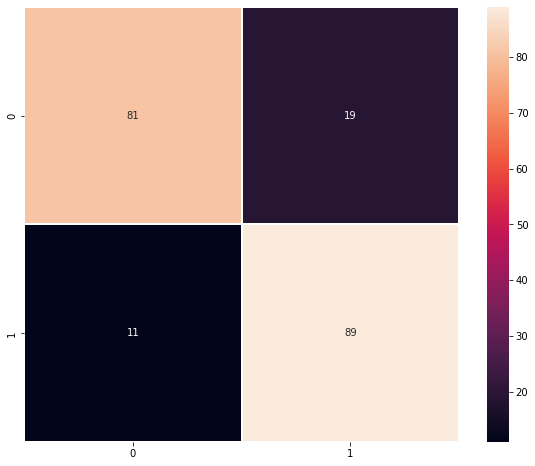

In [18]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)
print(accuracy)
y_pred=model.predict(X_test_normalized)
prediction = []
for x in y_pred:
    if x > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_encoded,prediction)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
print(y_test[8])
plt.imshow(X_test_normalized[8])

In [19]:
model.predict(X_test_normalized[8:12])

array([[0.9169427],
       [0.9955031],
       [0.3039797],
       [0.9246912]], dtype=float32)

In [26]:
import pickle
save_path = './model.h5'
model.save(save_path)

In [28]:
loaded_model= tf.keras.models.load_model(save_path)


array([[0.9169427],
       [0.9955031],
       [0.3039797],
       [0.9246912]], dtype=float32)